In [18]:
import numpy as np
import scipy as sp

In [55]:
import re

In [122]:
from scipy import spatial

In [128]:
from scipy.spatial.distance import cosine

In [107]:
file_obj = open('sentences.txt')

In [108]:
lines_list = list(file_obj)

In [109]:
for i in range(len(lines_list)):
    lines_list[i] = lines_list[i].strip()
    lines_list[i] = lines_list[i].lower()
    #print lines_list[i]

In [110]:
words_list = re.split('[^a-z]', ' '.join(lines_list))

In [111]:
words_list = list(filter(None, words_list))

In [112]:
f = set(words_list)
words_list_without_rep = list(f)

In [113]:
word_dict = dict()

In [114]:
for line in words_list_without_rep:
    word_dict[line] = words_list.count(line)

In [115]:
a = np.zeros((len(lines_list), len(words_list_without_rep)))

In [117]:
for i in range(len(lines_list)):
    #print lines_list[i]
    words_list_in_line = re.split('[^a-z]', lines_list[i])
    
    for j in range(len(words_list_without_rep)):
        a[i][j] = words_list_in_line.count(words_list_without_rep[j])
            
        #a[i][j] = word_dict[words_list_without_rep[j]]
        #lines_list.count(words_list_without_rep)

In [140]:
words_list_in_line_0 = np.array(re.split('[^a-z]', lines_list[0]))
for i in range(len(lines_list)):
    words_list_in_line = np.array(re.split('[^a-z]', lines_list[i]))
    res[i] = sp.spatial.distance.cosine(words_list_in_line_0,words_list_in_line)

ValueError: data type must provide an itemsize

In [141]:
words_list_in_line_0 = np.array(re.split('[^a-z]', lines_list[0]))
print cosine(words_list_in_line_0, words_list_in_line_0)

ValueError: data type must provide an itemsize

In [142]:
aa = np.array(
    [                                                                                          
        ['sdgfsg'],                                                                             
        ['zxgfs']                                                                            
    ]
)


bb = np.array(
    [                                                                                          
        ['fsag'],                                                                             
        ['yruyr']                                                                            
    ]
)


In [143]:
print cosine(aa, bb)

ValueError: data type must provide an itemsize

In [144]:
words_list_in_line_0 = re.split('[^a-z]', lines_list[0])

In [145]:
print words_list_in_line_0

['in', 'comparison', 'to', 'dogs', '', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process', '']


In [146]:
print words_list_in_line_0[np.newaxis, :]

TypeError: list indices must be integers, not tuple

In [130]:
print cosine(['A','B','C'],['D','E','F'])

ValueError: data type must provide an itemsize

In [124]:
#print len(words_list_without_rep)
print lines_list[0]

in comparison to dogs, cats have not undergone major changes during the domestication process.


In [131]:
from scipy.spatial.distance import pdist, squareform

In [91]:
#print word_dict['as']

6


In [92]:
#print words_list_without_rep[0]

displays


In [93]:
print lines_list[0]

in comparison to dogs, cats have not undergone major changes during the domestication process.


In [94]:
print lines_list[0].count('in')

2


In [ ]:
# for line in words_list: print line

In [ ]:
#for line in words_list_without_rep: 
#    print words_list.count(line)

In [148]:
# Python 3.4.3
from numpy import zeros, dot, savetxt
from numpy.linalg import norm
 
# Definition of a cosine distance function
# according to scipy.spatial.distance.cosine function's description 
def cosine_distance(u, v):
    return 1.0 - (dot(u, v) / (norm(u) * norm(v)))
 
if __name__ == "__main__":
    with open("sentences.txt") as f:
        # Let's determine a number of lines in a text file
        lines = sum(1 for _ in f)
        f.seek(0)
        
        import re
        words = {}
        # The 'lcount' variable controlls the index of a current line in the text file,
        # when the 'wcount' variable controlls the index of a unique word.
        lcount, wcount = 0, 0
        for line in f:
            # Here we compile a pattern object, read a line from the text file,
            # and split it into tokens (words).
            p = re.compile(r"[^a-z]+")
            tokens = p.split(line.lower())
            # In this case we will have only one empty token at the end of a list.
            # Let's remove it.
            tokens.pop()
            for token in tokens:
                # If a token is not presented in the dictionary yet then we add it.
                # The value of the 'occurrences' entry is a list object where every item represents
                # a specific line in the text file. The first item represents the first line, the second item
                # represents the sencond line etc. 
                if token not in words:
                    words[token] = {
                        "index": wcount,
                        "occurrences": [0] * lines
                    }
                    wcount += 1
                # If we find the same token in the same list of tokens (in the same line)
                # then we just ignore it.
                elif words[token]["occurrences"][lcount] != 0:
                    continue
                
                # Here we register how many times a token occured in a list of tokens (in a line)    
                words[token]["occurrences"][lcount] = tokens.count(token)    
            lcount += 1
        
        # Here we create a numpy-array, filled with zeros
        arr = zeros((lines, len(words)))
        
        # Now for every word in the dictionary we take a number of its occurrences
        # in every line and put it to the array.  
        for word in words:
            i, j = 0, words[word]["index"]
            for occ in words[word]["occurrences"]:
                arr[i, j] = occ
                i += 1
    
        #savetxt("foo.csv", arr, delimiter=",")
        
        # Finally we calculate a cosine distance between the first sentence (line) and
        # other sentences in the text file
        dist = [] 
        u = arr[0,] 
        for i in range(1, lines):
            v = arr[i,]
            dist.append({"index": i, "distance": cosine_distance(u, v)})    
        
        dist.sort(key=lambda x: x["distance"])
        print("The 1st closest sentence is a sentence #%d with a cosine distance of %.2f.\n"\
        "The 2nd closest sentence is a sentence #%d with a cosine distance of %.2f." % (
            dist[0]["index"],
            dist[0]["distance"],
            dist[1]["index"],
            dist[1]["distance"]
        ))


The 1st closest sentence is a sentence #6 with a cosine distance of 0.73.
The 2nd closest sentence is a sentence #4 with a cosine distance of 0.78.


In [149]:
a = np.array([[1, 1], [1, 15]])
b = np.array([3.2522, 0.6352])
x = np.linalg.solve(a, b)

In [150]:
print "Матрица A:\n", a
print "Вектор b:\n", b
print "Решение системы:\n", x

Матрица A:
[[ 1  1]
 [ 1 15]]
Вектор b:
[ 3.2522  0.6352]
Решение системы:
[ 3.43912857 -0.18692857]


In [151]:
%matplotlib inline

In [152]:
from matplotlib import pylab as plt

In [154]:
import math

In [166]:
from numpy import arange, sin, exp

In [164]:
x = np.arange(1.0, 16, 0.01)

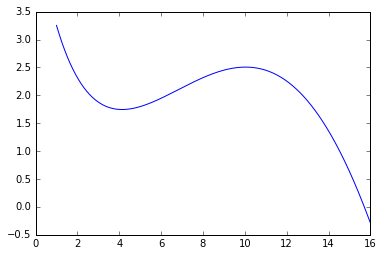

In [167]:
plt.plot(x, sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2))
plt.show()

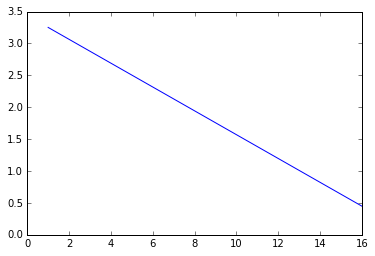

In [168]:
plt.plot(x, 3.43912857-0.18692857*x )

In [174]:
a = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
b = np.array([3.2522, 2.3161, 0.6352])
x = np.linalg.solve(a, b)

print "Матрица A:\n", a
print "Вектор b:\n", b
print "Решение системы:\n", x

Матрица A:
[[  1   1   1]
 [  1   8  64]
 [  1  15 225]]
Вектор b:
[ 3.2522  2.3161  0.6352]
Решение системы:
[ 3.32512857 -0.06532857 -0.0076    ]


In [175]:
x = np.arange(1.0, 16, 0.01)

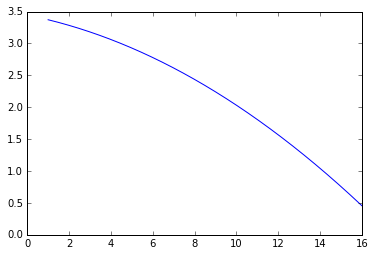

In [176]:
plt.plot(x, 3.44519286-0.06532857*x-0.0076*(x**2) )

In [177]:
a = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 3375]])
b = np.array([3.2522, 1.7468, 2.5054, 0.6352])
x = np.linalg.solve(a, b)

print "Матрица A:\n", a
print "Вектор b:\n", b
print "Решение системы:\n", x

Матрица A:
[[   1    1    1    1]
 [   1    4   16   64]
 [   1   10  100 1000]
 [   1   15  225 3375]]
Вектор b:
[ 3.2522  1.7468  2.5054  0.6352]
Решение системы:
[ 4.36264704 -1.29555203  0.19334079 -0.00823581]


In [178]:
x = np.arange(1.0, 16, 0.01)

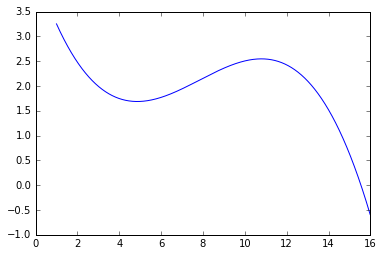

In [179]:
plt.plot(x, 4.36264704-1.29555203*x+0.19334079*(x**2)-0.00823581*(x**3) )